## Part1. seaborn 차트 기본
- seaborn에서 제공하는 년도,월,승객수 'flights' 자료로 seaborn 차트 기본 제작
- 코드 참고(https://zephyrus1111.tistory.com/248)

In [293]:
import seaborn as sns
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [295]:
# 전체 데이터는 36개인데, 중복제거하니
# 12개임. (df['year'].numique)
df['year'].unique(), df['year'].nunique()

(array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
        1960], dtype=int64),
 12)

In [296]:
# 년도별 갯수를 확인하니 각각3개씩 있음
df['year'].value_counts()

year
1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: count, dtype: int64

In [297]:
# 월별 count
df['month'].value_counts()

month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64

In [298]:
#  확인 
df[df['year']==1949]



,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [299]:

# 연도별 승객 수 계산
passengers_by_year =df.groupby('year')['passengers'].sum().reset_index()
passengers_by_year

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


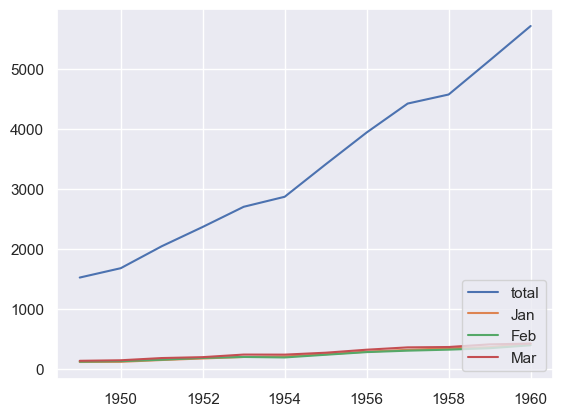

In [300]:
# matplot 차트에서 작업
import matplotlib.pyplot as plt

plt.plot(passengers_by_year['year'], passengers_by_year['passengers'],label='total')
plt.legend(loc='lower right')

tmp=df[df['month']=='Jan']
plt.plot(tmp['year'], tmp['passengers'],label='Jan')
plt.legend(loc='lower right')


tmp=df[df['month']=='Feb']
plt.plot(tmp['year'], tmp['passengers'],label='Feb')
plt.legend(loc='lower right')


tmp=df[df['month']=='Mar']
plt.plot(tmp['year'], tmp['passengers'],label='Mar')
plt.legend(loc='lower right')


<Axes: xlabel='year', ylabel='passengers'>

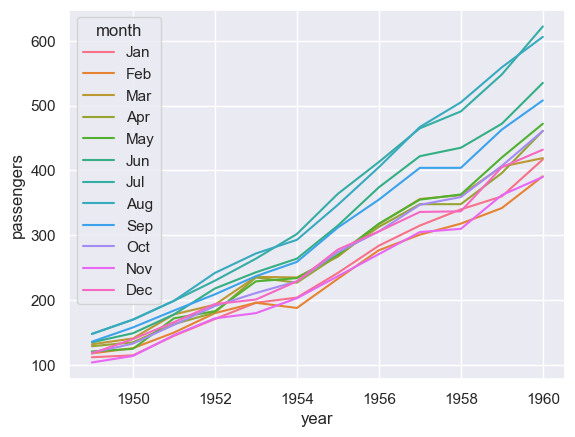

In [301]:
## seaborn 차트로는 쉽게 그릴수 있음

sns.lineplot(data=df, 
             x='year',
             y='passengers',
             hue='month')
        

<Axes: xlabel='year', ylabel='passengers'>

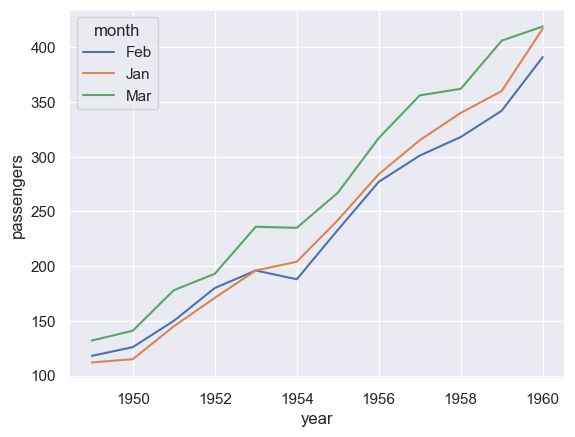

In [302]:
## seaborn 차트로는 쉽게 그릴수 있음
temp_months=['Feb','Jan','Mar']
sns.lineplot(data=df, 
             x='year',
             y='passengers',
             hue='month',
            hue_order=temp_months) 

<Axes: xlabel='year', ylabel='passengers'>

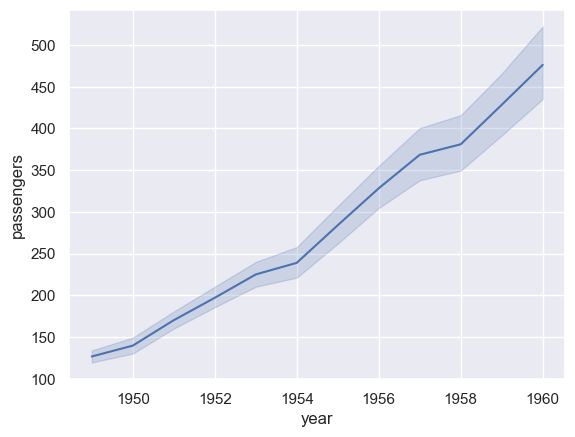

In [303]:
# 범주를 지정하지 않으면 
# 각 연도마다 1~3월 탑승객 데이터를 이용하여 
# 각 열의의 최소탑승객과 최대탑승객의 상하한을 그림.
# 가운데 진한선은 3개의 평균
sns.lineplot(data=df, x='year', y='passengers')

<Axes: xlabel='year', ylabel='passengers'>

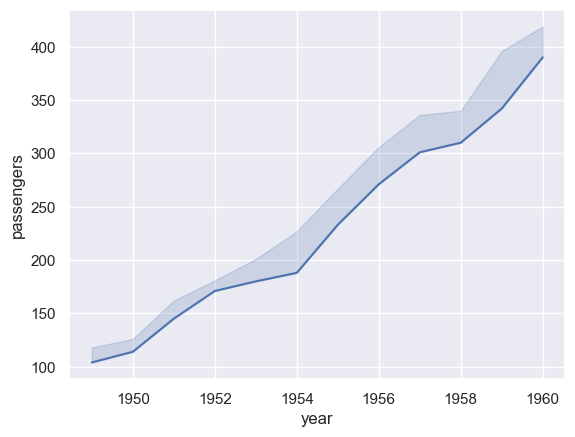

In [304]:
# 최소값으로 맞추어서 그림
import numpy as np
sns.lineplot(data=df, x='year', y='passengers', estimator=np.min) 

<Axes: xlabel='year', ylabel='passengers'>

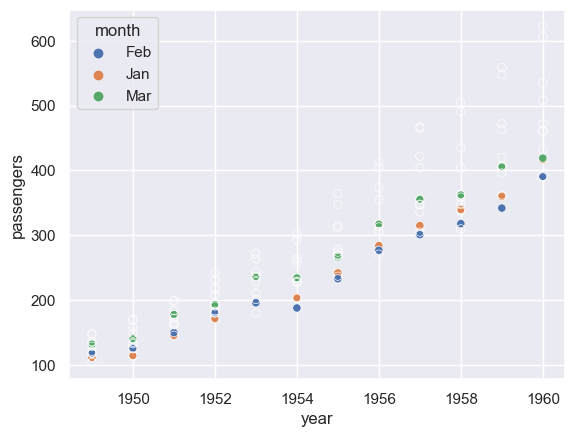

In [305]:
# 산점도 차트
temp_months=['Feb','Jan','Mar']
sns.scatterplot(x='year',y='passengers',hue='month',
                data=df,hue_order=temp_months)

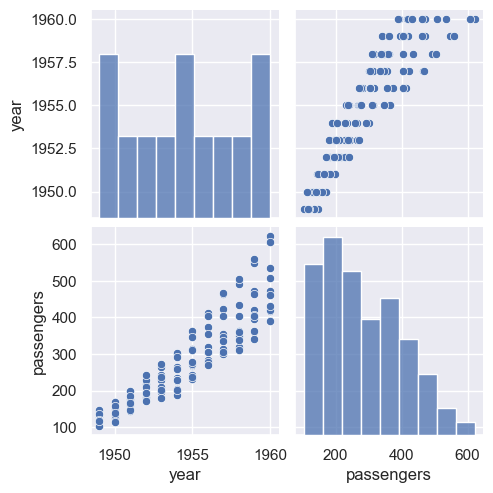

In [306]:
# pairplot를 하면 자동으로 숫자필드만 이용하여서 표시해줌
sns.pairplot(df)

<Axes: xlabel='passengers', ylabel='Density'>

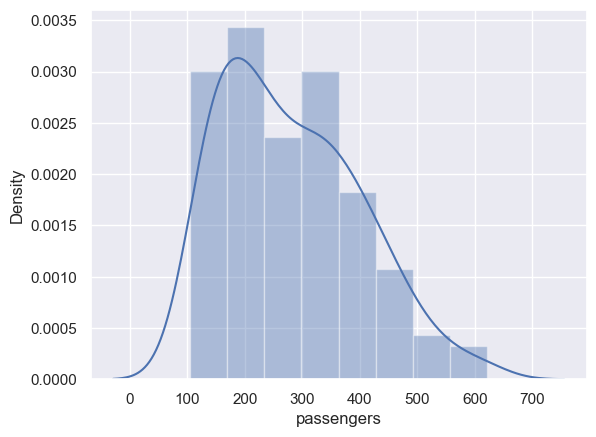

In [307]:
# 승객분포도(히스토그램)
sns.distplot(df['passengers'])

<Axes: xlabel='passengers', ylabel='Count'>

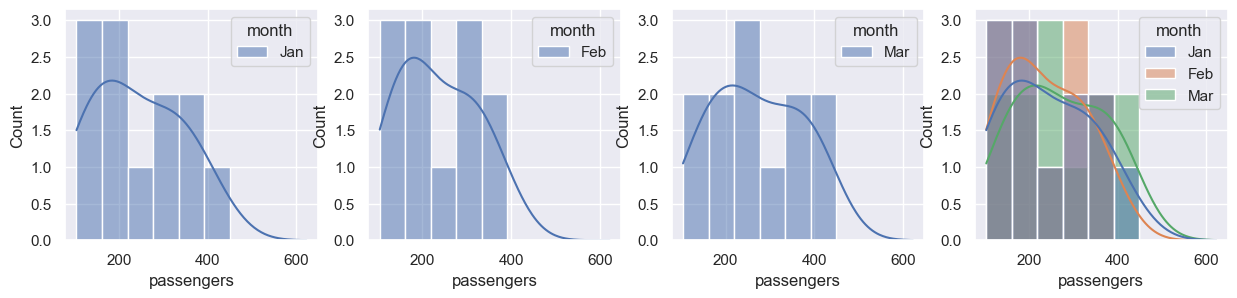

In [308]:
# kde=True를 하면 부드러운 곡선이 나옴

fig, ax = plt.subplots(ncols=4)
fig.set_size_inches((15,3))
        

tmp=['Jan']
sns.histplot(x='passengers',data=df,hue='month',kde=True,
             hue_order=tmp,
             ax=ax[0])

tmp=['Feb']
sns.histplot(x='passengers',data=df,hue='month',kde=True,
             hue_order=tmp,
             ax=ax[1])

tmp=['Mar']
sns.histplot(x='passengers',data=df,hue='month',kde=True,
             hue_order=tmp,
             ax=ax[2])


### 3개값이 겹쳐지며 투명하개 아래값을 비추는것임
tmp=['Jan','Feb','Mar']
sns.histplot(x='passengers',data=df,hue='month',kde=True,
             hue_order=tmp,
             ax=ax[3])

### Part2. seaborn 차트를 이용한 tips 비용 분석
- 아래사이트를 참조하여 작업
- https://mindscale.kr/course/python-visualization-basic/grid/


In [309]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


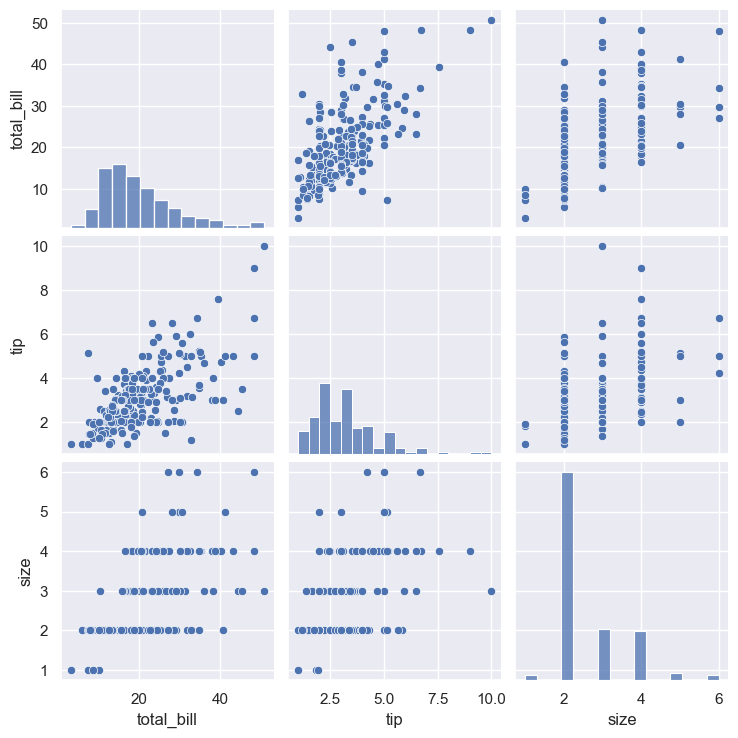

In [310]:
# pairplot를 하면 자동으로 숫자필드만 이용하여서 표시해줌
sns.pairplot(tips)

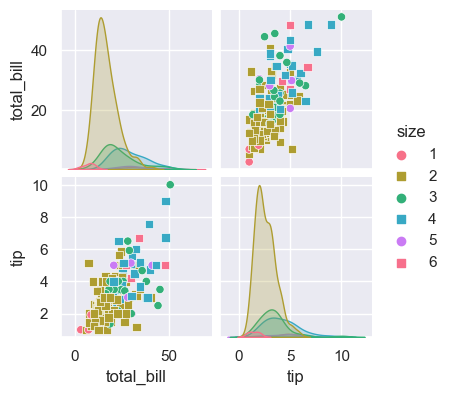

In [311]:
# 옵션값
# https://steadiness-193.tistory.com/198
sns.pairplot(tips,hue='size',
             palette='husl',
             markers=['o', 's'],
            height=2)

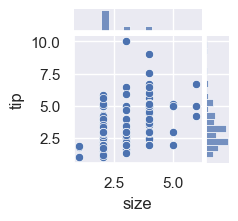

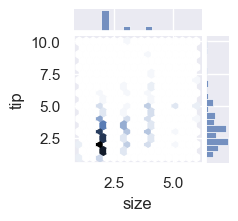

In [312]:
# https://steadiness-193.tistory.com/197

sns.jointplot(tips, x='size', y='tip',height=2)

# 겹친곳 쉽게 찾기
sns.jointplot(tips, x='size', y='tip', kind='hex',height=2)


Text(0.5, 1.0, 'Boxplot')

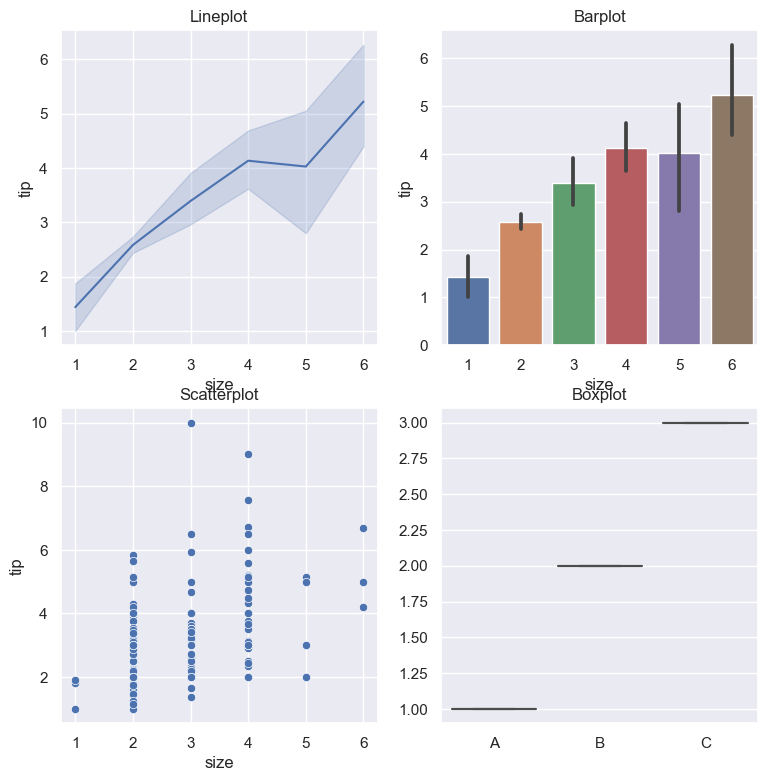

In [313]:
# 여러개 차트 그리기  (참고: jointplot는 ax안됨)
# https://coduking.com/entry/Matplotlib-Subplot-%ED%99%9C%EC%9A%A9%EB%B0%A9%EB%B2%95
# 2x2 그리드로 서브플롯 생성
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
x=tips['size']
y=tips['tip']
# 선 그래프
sns.lineplot(x=x, y=y, ax=ax[0, 0])
ax[0, 0].set_title('Lineplot')

# 막대 그래프
sns.barplot(x=x, y=y, ax=ax[0, 1])
ax[0, 1].set_title('Barplot')

# 산점도
sns.scatterplot(x=x, y=y, ax=ax[1, 0])
ax[1, 0].set_title('Scatterplot')

# 박스 플롯
sns.boxplot(x=["A", "B", "C"], y=[1, 2, 3], ax=ax[1, 1])
ax[1, 1].set_title('Boxplot')

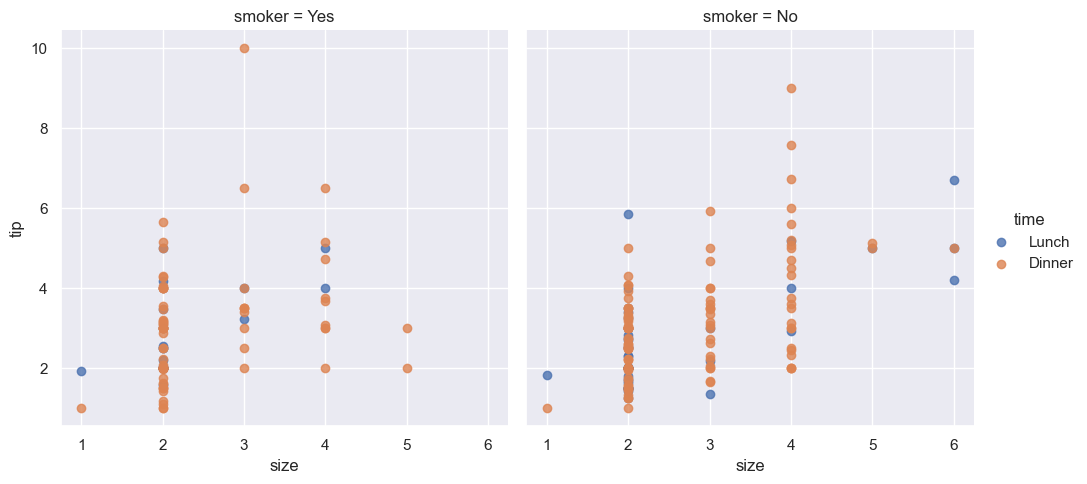

In [314]:
# 산점도 차트
# https://steadiness-193.tistory.com/199?category=953258
sns.lmplot(x='size',y='tip', data=tips,col='smoker', 
           hue='time',
           fit_reg=False)

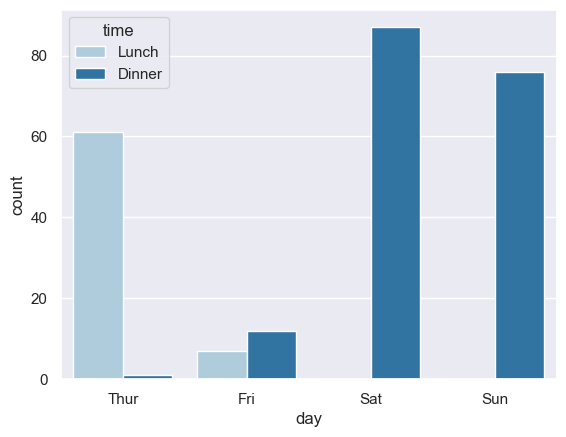

In [315]:
# 막대차트
sns.set(style='darkgrid')
sns.countplot(x="day", hue="time",palette='Paired', data=tips)
plt.show()

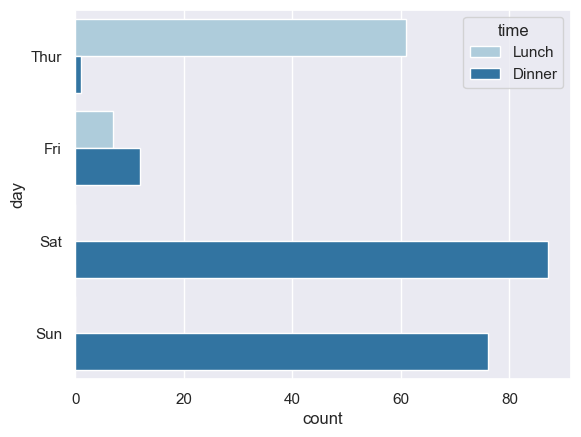

In [316]:
# 막대차트
sns.countplot(y="day", hue="time", palette='Paired',data=tips)
plt.show()

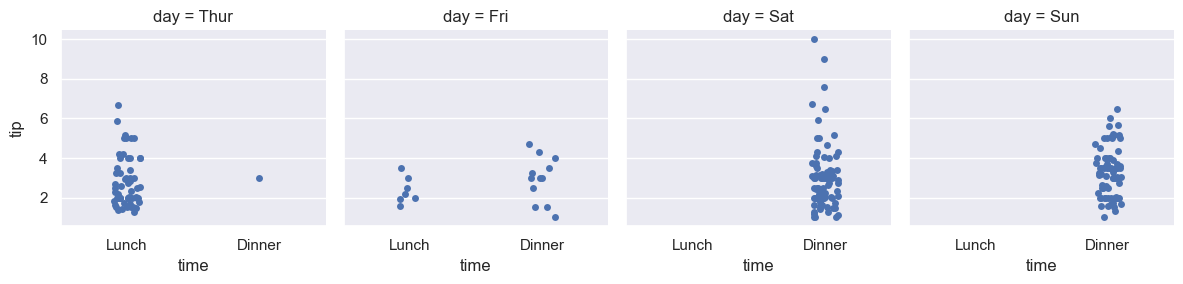

In [317]:
grid = sns.FacetGrid(data=tips, col='day')
grid.map(sns.stripplot, "time", "tip")

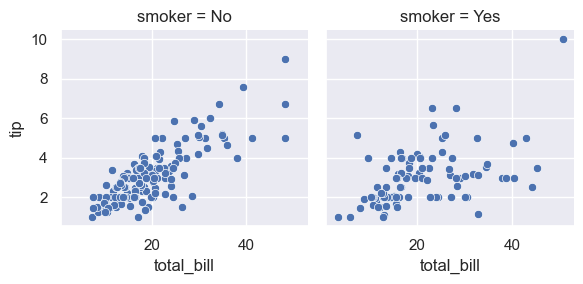

In [318]:
grid = sns.FacetGrid(data=tips, 
                     col='smoker',
                     col_order=['No', 'Yes'])
grid.map(sns.scatterplot, "total_bill", "tip")

<Axes: xlabel='day', ylabel='tip'>

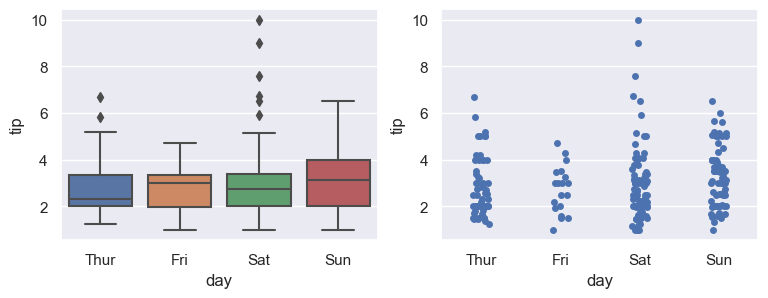

In [319]:
### 박스플랏 차트

fig, ax = plt.subplots(1, 2, figsize=(9, 3))
sns.boxplot(x='day', y='tip',data=tips, ax=ax[0])

sns.stripplot(x='day', y='tip',data=tips,ax=ax[1])


In [320]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [321]:
# 상관계수 구하기

tmp=tips[['total_bill','tip','size']]
print(tmp.corr(method='pearson'))

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

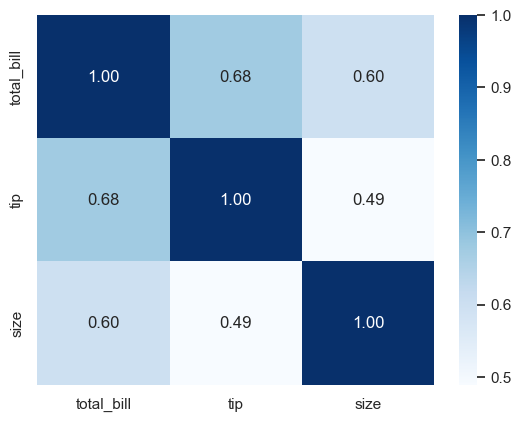

In [322]:
df_corr=tmp.corr(method='pearson')
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")